This code is taken and modified from Freecodecamp Tutorial

(0.0, 6.0, 0.0, 20.0)

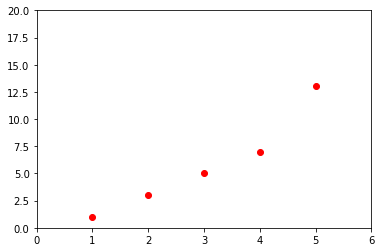

In [17]:
import matplotlib.pyplot as plt
import numpy as np

x = [1, 2, 3, 4, 5]
y = [1, 3, 5, 7, 13]
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])

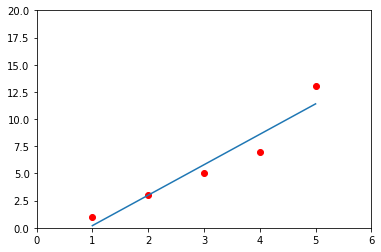

In [18]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [19]:
!pip install -q sklearn

In [21]:
%tensorflow_version 2.x 

In [22]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [30]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
print("Loaded Dataframes")
print(dftrain)
print()
print()
print(dfeval)
print()
print()
print("After popping the survived")
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(y_train,"\n","\n")
print(y_eval)

Loaded Dataframes
     survived     sex   age  ...     deck  embark_town  alone
0           0    male  22.0  ...  unknown  Southampton      n
1           1  female  38.0  ...        C    Cherbourg      n
2           1  female  26.0  ...  unknown  Southampton      y
3           1  female  35.0  ...        C  Southampton      n
4           0    male  28.0  ...  unknown   Queenstown      y
..        ...     ...   ...  ...      ...          ...    ...
622         0    male  28.0  ...  unknown  Southampton      y
623         0    male  25.0  ...  unknown  Southampton      y
624         1  female  19.0  ...        B  Southampton      y
625         0  female  28.0  ...  unknown  Southampton      n
626         0    male  32.0  ...  unknown   Queenstown      y

[627 rows x 10 columns]


     survived     sex   age  ...     deck  embark_town  alone
0           0    male  35.0  ...  unknown  Southampton      y
1           0    male  54.0  ...        E  Southampton      y
2           1  female  58

In [31]:
dftrain.describe() # Getting statistical insights from our data

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [33]:
y_train.shape

(627, 9)

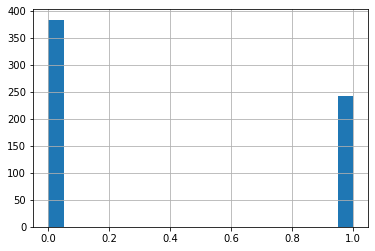

In [38]:
y_train.hist(bins=20) #Simple visualization to know the data

In [39]:
""" Catagorical Data has to be converted to numaricals  so we have a tool for that in TensorFlow ,Which gets the unique labels and assigns it to datframe   """


CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck','embark_town', 'alone']
NUMERIC_COLUMNS = ['age', 'fare']

feature_columns = []

for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()  # gets a list of all unique values from given feature column
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))

print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [44]:
"""  we must create a input function that can convert our current pandas dataframe into tf.data.Dataset object """

def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):

  def input_function(): 
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))  
    if shuffle:
      ds = ds.shuffle(1000)  
    ds = ds.batch(batch_size).repeat(num_epochs) 
    return ds  

  return input_function 

train_input_fn = make_input_fn(dftrain, y_train)
print(train_input_fn)  
eval_input_fn = make_input_fn(dfeval, y_eval, num_epochs=1, shuffle=False)

<function make_input_fn.<locals>.input_function at 0x7ff7b3dd89d8>


In [45]:
linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp6sjw_hnr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [49]:
linear_est.train(train_input_fn)  # train
result = linear_est.evaluate(eval_input_fn)  # get model metrics/stats by testing on tetsing data

clear_output()  # clears consoke output
print(result['accuracy']) #I got maximum accuracy of 78%

0.77272725
